In [65]:
from collections import Counter

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline

In [66]:
train = pd.read_csv('dogs_n_cats.csv').sample(frac=1)
train.head()

,Length,Height,Fur,Bark,Climb,Type
739,8,3.2,1,0,1,cat
617,7,2.8,1,0,1,cat
44,16,19.2,1,1,0,sweet_dog
542,7,2.8,1,0,1,cat
973,5,2.0,1,0,1,cat


In [67]:
train.isnull().sum()

Length    0
Height    0
Fur       0
Bark      0
Climb     0
Type      0
dtype: int64

In [68]:
X_train = train.drop('Type', axis = 1)
y_train = train.Type

X_train.head()

,Length,Height,Fur,Bark,Climb
739,8,3.2,1,0,1
617,7,2.8,1,0,1
44,16,19.2,1,1,0
542,7,2.8,1,0,1
973,5,2.0,1,0,1


In [69]:
y_train.head()

739          cat
617          cat
44     sweet_dog
542          cat
973          cat
Name: Type, dtype: object

In [70]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [71]:
dtc_train = clf.fit(X_train, y_train)

[Text(167.4, 163.07999999999998, 'Length <= 14.5\nentropy = 1.0\nsamples = 1000\nvalue = [500, 500]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [500, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 500\nvalue = [0, 500]')]

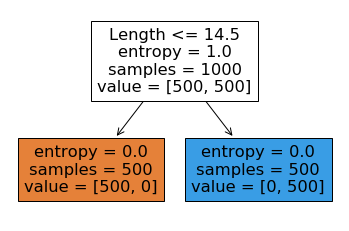

In [72]:
plot_tree(dtc_train, filled=True, feature_names=list(X_train))

In [73]:
test = pd.read_json('a.json')
Counter(dtc_train.predict(test))

Counter({'sweet_dog': 46, 'cat': 54})